In [2]:
#importing the libraries required for the model
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 10,8

In [3]:
# Reading the Data
df = pd.read_csv('loan_data_set.csv')

In [4]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 43.2+ KB


In [7]:
#finding the Null Values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
# Converting the Null values with thier Corresponding Means and Mode to increase The Accuracy
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mean())

In [9]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [10]:
# Checking wether there are any more Null value left
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [11]:
#Understanding the Data
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [13]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [14]:
#plotting the data using seaborn libraries
import seaborn as sb

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Credit_History', ylabel='count'>

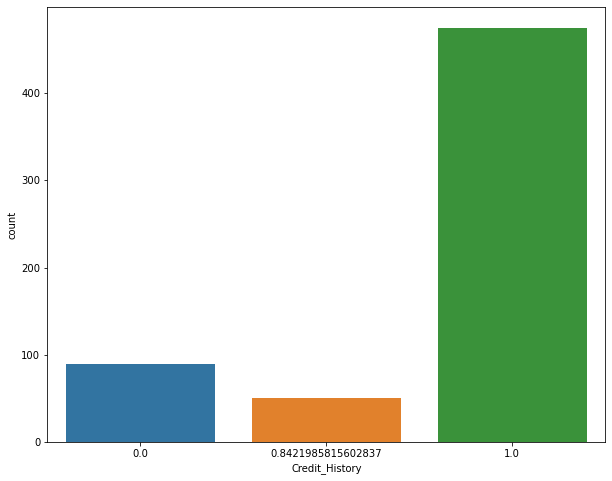

In [25]:
sb.countplot(df['Credit_History'])

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

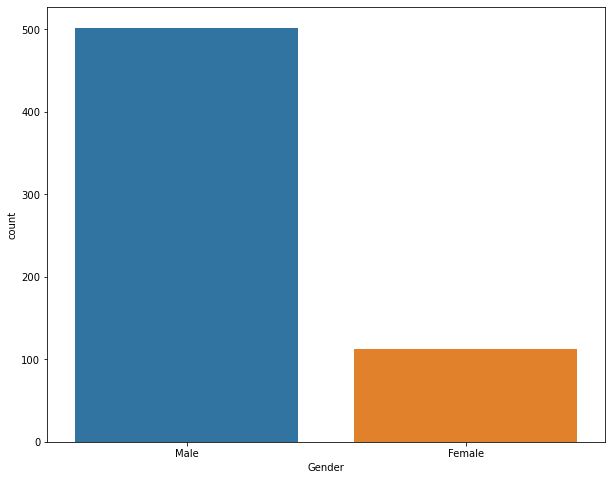

In [16]:
sb.countplot(df['Gender'])

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Dependents', ylabel='count'>

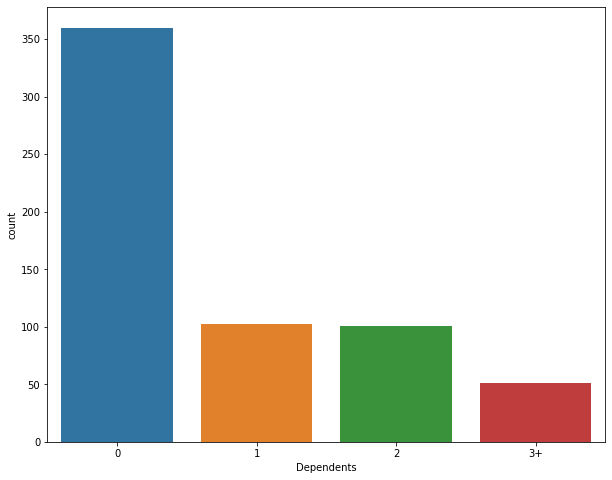

In [17]:
sb.countplot(df['Dependents'])

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

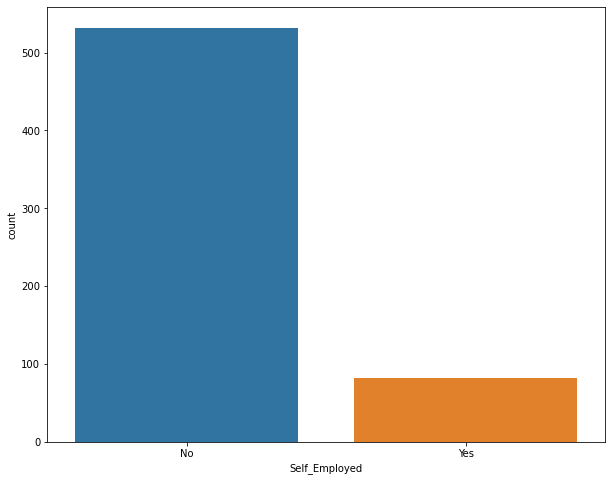

In [18]:
sb.countplot(df['Self_Employed'])

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Property_Area', ylabel='count'>

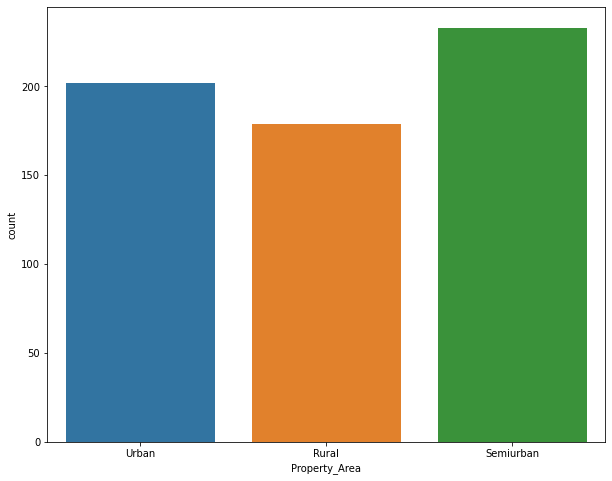

In [19]:
sb.countplot(df['Property_Area'])

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Education', ylabel='count'>

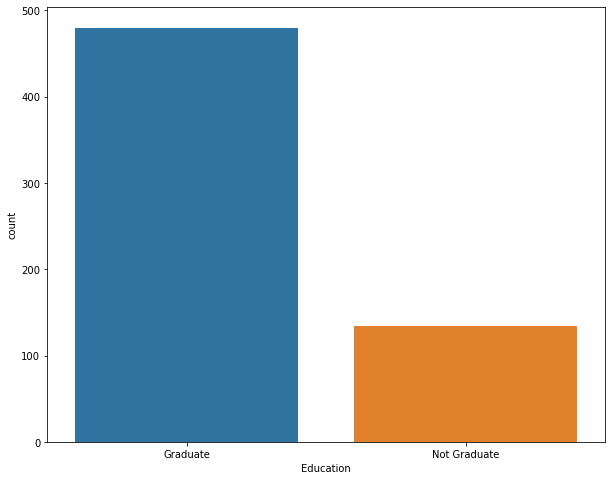

In [20]:
sb.countplot(df['Education'])

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

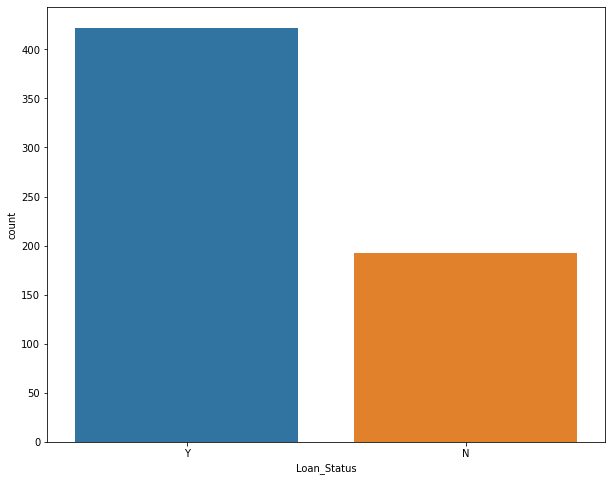

In [21]:
sb.countplot(df['Loan_Status'])

# From the countplot:

1)80% of applicants in the dataset are male.

2)Around 65% of the applicants in the dataset are married.

3)Around 15% of applicants in the dataset are self-employed.

4)Around 85% of applicants have repaid their doubts.

5)Most of the applicants don't have any dependents.

6)Around 80% of the applicants are Graduate.

7)Most of the applicants are from the Semiurban area.

In [22]:
df.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [24]:
#The loan of 422(around 69%) people out of 614 were approved.

In [125]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


C:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


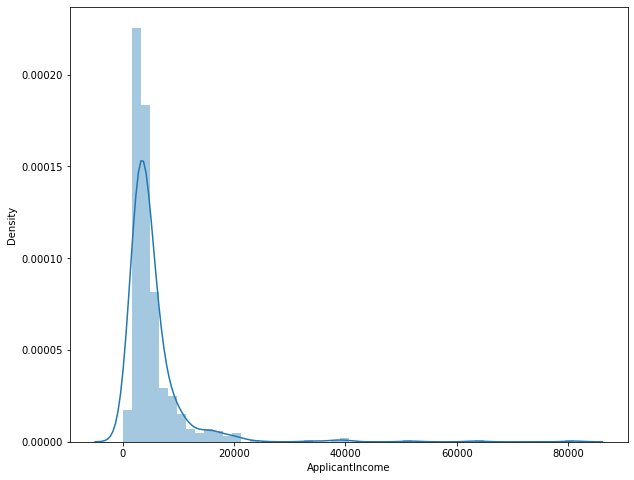

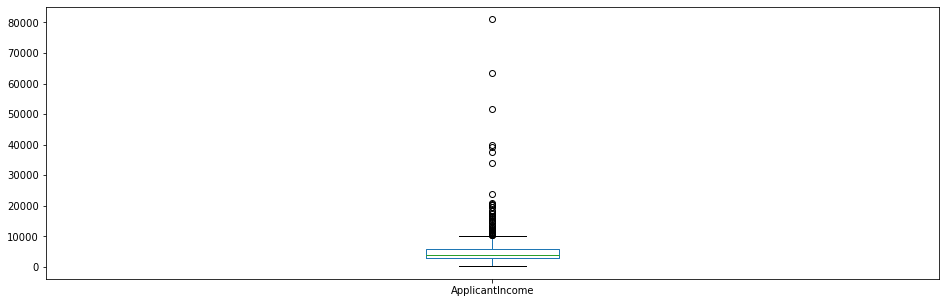

In [26]:
sb.distplot(df['ApplicantIncome'])
plt.show()
df['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

Text(0.5, 0.98, '')

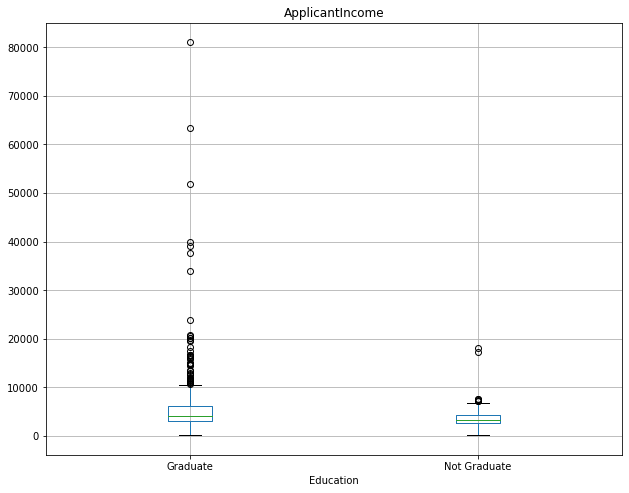

In [28]:
df.boxplot(column='ApplicantIncome', by = 'Education') 
plt.suptitle("")

In [ ]:
#In this we can see the no. of graduates with high income are very much which also creates an outlier

C:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


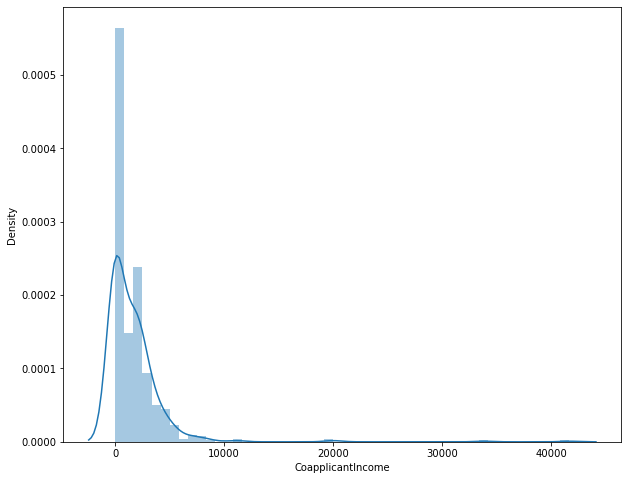

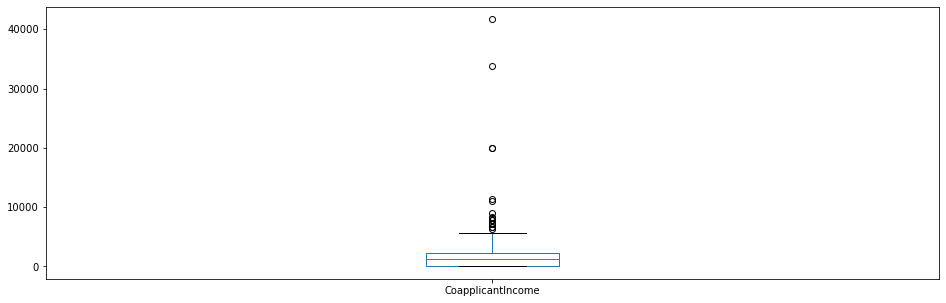

In [32]:
sb.distplot(df['CoapplicantIncome'])
plt.show()
df['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

In [ ]:
#The majority of the CoapplicantsIncome are between 0 to 5000 and there are outliers in CoapplicantIncome 

C:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


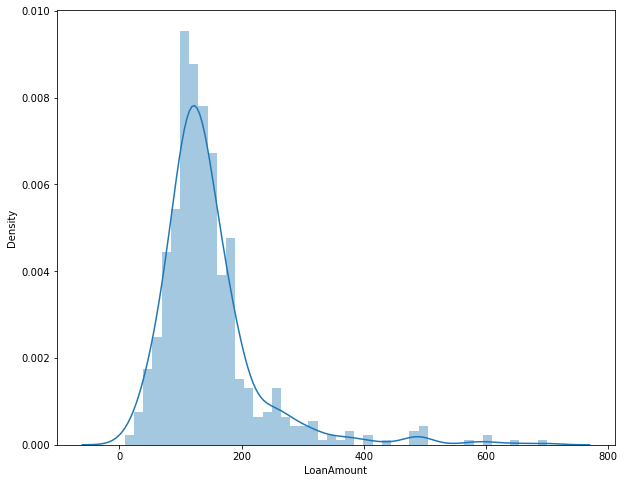

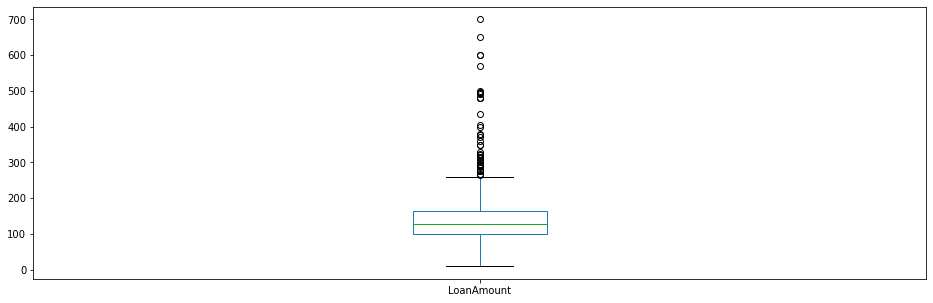

In [33]:
df.notna()
sb.distplot(df['LoanAmount'])
plt.show()
df['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

In [ ]:
#we see the lot of outliers in the LoanAmount and the distribution is fairly Normal!

# Relation Between the target variable and the independent variable(Gender)

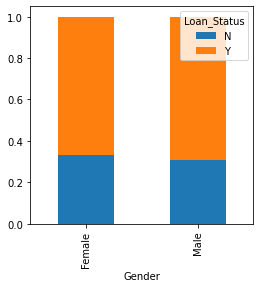

In [37]:
Gender=pd.crosstab(df['Gender'],df['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()


##### In this,it is clear that the proprotion for both the females and the males are proprtional to each other for Loan_Status

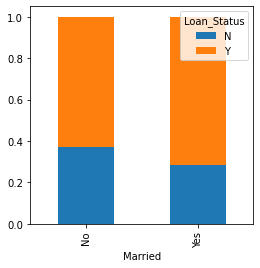

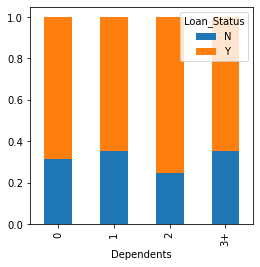

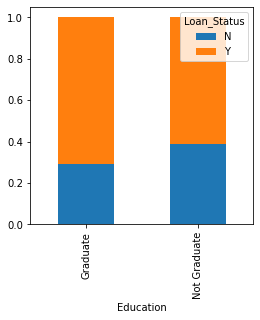

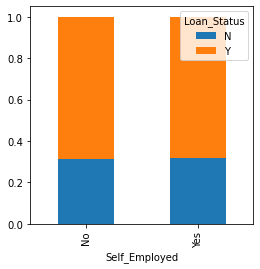

In [40]:
Married=pd.crosstab(df['Married'],df['Loan_Status'])
Dependents=pd.crosstab(df['Dependents'],df['Loan_Status'])
Education=pd.crosstab(df['Education'],df['Loan_Status'])
Self_Employed=pd.crosstab(df['Self_Employed'],df['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

### The proportion of married applicants is higher for approved loans.
### Distribution of applicants with 1 or 3+ dependents is similar across both thecategories of Loan_Status.
### There is nothing significant we can infer from Self_Employed vs Loan_Status plot.

# Numerical Independent Variable vs Target Variable

<AxesSubplot:xlabel='Loan_Status'>

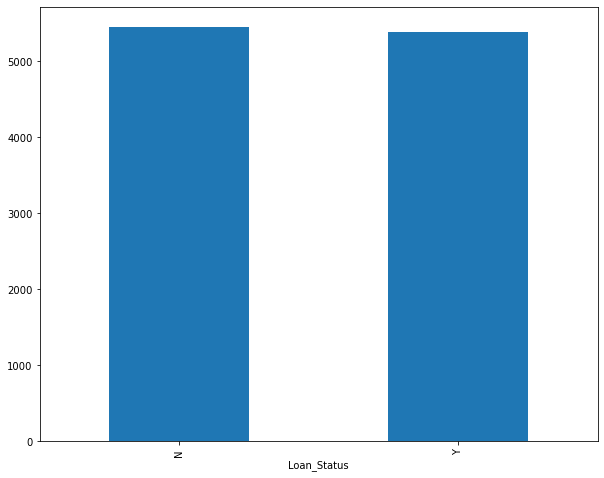

In [41]:
df.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

In [ ]:
# Here we dont't see the difference with the bins for the Loan_Status so we will make the bins varaible

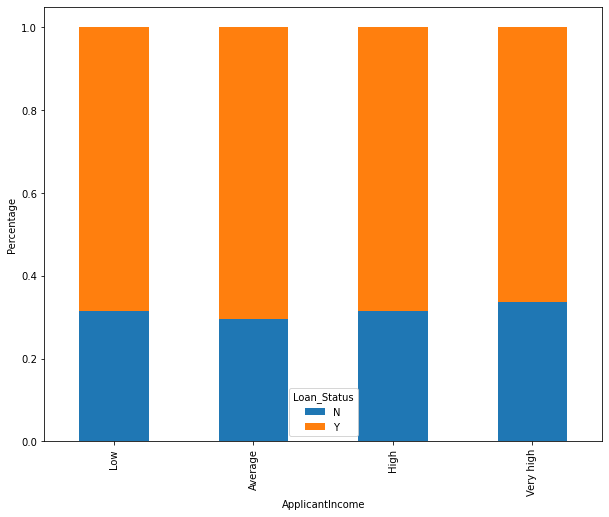

In [66]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very high']
df['Income_bin']=pd.cut(df['ApplicantIncome'],bins,labels=group)
Income_bin=pd.crosstab(df['Income_bin'],df['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('ApplicantIncome')
P=plt.ylabel('Percentage')

### Applicant's income does not affect the chances of loan approval which contradicts our hypothesis in which we assumed that if the applicant's income is high the chances of loan approval will also be high.

<AxesSubplot:>

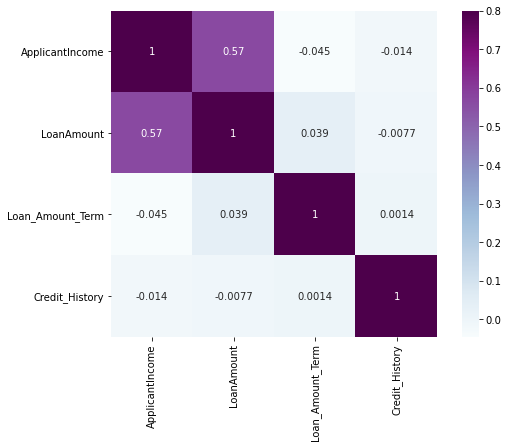

In [67]:
matrix = df.corr()
f, ax = plt.subplots(figsize=(9,6))
sb.heatmap(matrix,vmax=.8,square=True,cmap="BuPu", annot = True)

###    We see that the most correlate variables are (ApplicantIncome — LoanAmount). 

In [68]:
cols=['Loan_ID','CoapplicantIncome','Loan_Amount_Term']
df = df.drop(columns=cols,axis=1)

In [69]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status,Income_bin
0,Male,No,0,Graduate,No,5849,146.412162,1.0,Urban,Y,High
1,Male,Yes,1,Graduate,No,4583,128.000000,1.0,Rural,N,High
2,Male,Yes,0,Graduate,Yes,3000,66.000000,1.0,Urban,Y,Average
3,Male,Yes,0,Not Graduate,No,2583,120.000000,1.0,Urban,Y,Average
4,Male,No,0,Graduate,No,6000,141.000000,1.0,Urban,Y,High
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,71.000000,1.0,Rural,Y,Average
610,Male,Yes,3+,Graduate,No,4106,40.000000,1.0,Rural,Y,High
611,Male,Yes,1,Graduate,No,8072,253.000000,1.0,Urban,Y,Very high
612,Male,Yes,2,Graduate,No,7583,187.000000,1.0,Urban,Y,Very high


In [89]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender','Married','Education','Property_Area','Self_Employed','Income_bin']
le = LabelEncoder()
for col in cols:
    df[col]=le.fit_transform(df[col])
df['Loan_Status'] = le.fit_transform(df['Loan_Status'])

In [90]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status,Income_bin
0,1,0,0,0,0,5849,146.412162,1.0,2,1,1
1,1,1,1,0,0,4583,128.000000,1.0,0,0,1
2,1,1,0,0,1,3000,66.000000,1.0,2,1,0
3,1,1,0,1,0,2583,120.000000,1.0,2,1,0
4,1,0,0,0,0,6000,141.000000,1.0,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,71.000000,1.0,0,1,0
610,1,1,3,0,0,4106,40.000000,1.0,0,1,1
611,1,1,1,0,0,8072,253.000000,1.0,2,1,3
612,1,1,2,0,0,7583,187.000000,1.0,2,1,3


# Train Test Split / Model Building

In [91]:
x = df.drop(columns=['Loan_Status'],axis=1)
y = df['Loan_Status']

In [143]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status,Income_bin
0,1,0,0,0,0,5849,146.412162,1.0,2,1,1
1,1,1,1,0,0,4583,128.000000,1.0,0,0,1
2,1,1,0,0,1,3000,66.000000,1.0,2,1,0
3,1,1,0,1,0,2583,120.000000,1.0,2,1,0
4,1,0,0,0,0,6000,141.000000,1.0,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,71.000000,1.0,0,1,0
610,1,1,3,0,0,4106,40.000000,1.0,0,1,1
611,1,1,1,0,0,8072,253.000000,1.0,2,1,3
612,1,1,2,0,0,7583,187.000000,1.0,2,1,3


In [92]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30)


# Model Training

In [96]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30)
model.fit(x_train,y_train)
print("Accuracy is : ",model.score(x_test,y_test)*100)

Accuracy is :  83.24324324324324


## Since our Prediction is above 80% accurate this means we have identified 80% of the loan accurately 

# Using Regression

In [100]:
from sklearn.linear_model import LinearRegression

In [101]:
le = LinearRegression()
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30)


In [102]:
le.fit(x_train,y_train)

LinearRegression()

In [105]:
coeff_df = pd.DataFrame(le.coef_,x.columns,columns = ['Coefficient'])

In [106]:
coeff_df

,Coefficient
Gender,-0.058453
Married,0.117245
Dependents,0.000601
Education,-0.047641
Self_Employed,0.043853
ApplicantIncome,0.000003
LoanAmount,-0.000284
Credit_History,0.709379
Property_Area,0.015771
Income_bin,-0.026068


#### This means for each and every unit increased in the columns value increases one unit of the coeffienct column

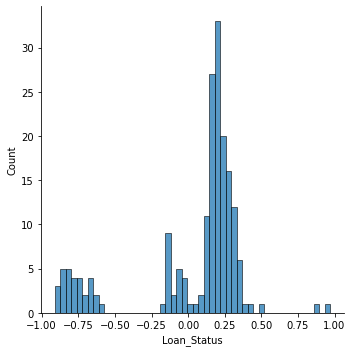

In [144]:
sb.displot((y_test-predictions),bins=50)
plt.show()